In [2]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

conn = pymysql.connect(
    host= 'localhost',
    port=3306,
    user='root',
    password='root',
    db='shopping'
)

cur = conn.cursor()

In [3]:
''' **Column List**
Customer_ID: 각 개별 고객에게 할당된 고유 식별자로, 시간에 따른 쇼핑 행동 추적과 분석을 용이하게 함
Age: 고객의 나이로, 세분화 및 대상 마케팅 전략에 대한 인구 통계 정보를 제공
Gender: 고객의 성별 식별로, 제품 선호도와 구매 패턴에 영향을 주는 주요 인구 통계 변수
Item_Purchased: 거래 중에 고객이 선택한 특정 제품 또는 항목
Category: 구매한 항목이 속하는 대분류 또는 그룹
Purchase_Amount: 거래의 통화 가치로, 미국 달러(USD)로 표시되며, 구매한 상품의 비용
Location: 구매가 이루어진 지리적 위치로, 지역 선호도와 시장 동향에 대한 통찰력을 제공
Size: 구매한 항목의 사이즈 사양(해당하는 경우)으로, 의류, 신발 및 일부 소비재에 관련이 있음
Color: 구매한 항목과 관련된 색상 변형 또는 선택으로, 고객 선호도와 제품 가용성에 영향을 줌
Season: 구매한 항목의 계절적인 적합성(예: 봄, 여름, 가을, 겨울)으로, 재고 관리와 마케팅 전략에 영향을 줌
Review_Rating: 고객이 구매한 항목에 대한 수치적 또는 정성적 평가로, 구매한 항목에 대한 만족도를 나타냄
Subscription_Status: 고객이 구독 서비스를 선택했는지 여부를 나타내며, 충성도 수준과 반복 수익 가능성에 대한 통찰력을 제공
Shipping_Type: 구매한 항목을 배송하기 위해 사용된 방법을 지정하며(예: 표준 배송, 특급 배송), 배송 시간과 비용에 영향
Discount_Applied: 구매에 프로모션 할인이 적용되었는지 여부를 나타내며, 가격 민감도와 프로모션 효과에 대한 정보를 제공
Promo_Code_Used: 거래 중에 프로모션 코드 또는 쿠폰이 사용되었는지 여부를 기록하여 마케팅 캠페인의 성공을 평가하는 데 도움을 줌
Previous_Purchases: 고객이 이전에 얼마나 자주 구매를 했는지 또는 구매 횟수에 대한 정보로, 고객 세분화와 유지 전략에 기여
Payment_Method: 고객이 사용한 결제 방식을 지정하며(예: 신용카드, 현금), 선호하는 결제 옵션에 대한 통찰력을 제공
Frequency_of_Purchases: 고객이 구매 활동을 얼마나 자주하는지를 나타내며, 고객 충성도와 평생 가치를 평가하는 데 중요한 지표

'''

sql = "select * from shopping_trends"
cur.execute(sql)

result = cur.fetchall()
df = pd.DataFrame(result)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [4]:
pri_table = '''
    with pri_table as (
        select
            Category as C,
            Purchase_Amount as PA,
            Season as S,
            Review_Rating as RR,
            Previous_Purchases as PP,
            Frequency_of_Purchases as FP
        from
            shopping_trends as shopping
        order by
            Category
    )
'''

In [5]:
sql = '''
    select
        C,
        AVG(PA) as Purchase_mean,
        max(S) as Season_max,
        COUNT(S) as Season_count,
        AVG(RR) as Review_mean,
        AVG(PP) as Previous_mean,
        max(FP) as Frequency_max
    from
        pri_table
    group by
        C
'''
cur.execute(pri_table + sql)

result = cur.fetchall()

df = pd.DataFrame(result)
df


,0,1,2,3,4,5,6
0,Clothing,60.0253,Winter,1737,3.723143,25.1992,Weekly
1,Footwear,60.2554,Winter,599,3.790651,25.2321,Weekly
2,Outerwear,57.1728,Winter,324,3.746914,24.9568,Weekly
3,Accessories,59.8387,Winter,1240,3.768629,25.7258,Weekly


In [6]:
sql = '''
    select
        C,
        AVG(PA) as Purchase_mean,
        max(S) as Season_max,
        COUNT(S) as Season_count,        
        AVG(RR) as Review_mean,
        AVG(PP) as Previous_mean,
        min(FP) as Frequency_min,
        count(FP) as Frequency_count
    from
        pri_table
    group by
        C, FP
    order by
        1
'''
cur.execute(pri_table + sql)

result = cur.fetchall()

df = pd.DataFrame(result)
df


,0,1,2,3,4,5,6,7
0,Accessories,61.0326,Winter,184,3.823370,25.3478,Annually,184
1,Accessories,60.7389,Winter,180,3.731667,24.4556,Bi-Weekly,180
2,Accessories,59.3333,Winter,180,3.812778,26.1889,Every 3 Months,180
3,Accessories,58.1000,Winter,170,3.777647,24.4294,Fortnightly,170
4,Accessories,58.0526,Winter,171,3.780117,25.4620,Monthly,171
5,Accessories,59.4180,Winter,189,3.699471,26.8413,Quarterly,189
6,Accessories,62.1867,Winter,166,3.757831,27.3494,Weekly,166
7,Clothing,60.6395,Winter,258,3.731783,24.5775,Annually,258
8,Clothing,59.8704,Winter,247,3.642105,25.5951,Bi-Weekly,247
9,Clothing,60.8226,Winter,265,3.750566,24.8415,Every 3 Months,265


C:\Users\Daylight\AppData\Local\Temp\ipykernel_30568\3491563527.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(frequency, rotation = 90)
C:\Users\Daylight\AppData\Local\Temp\ipykernel_30568\3491563527.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(frequency, rotation = 90)
C:\Users\Daylight\AppData\Local\Temp\ipykernel_30568\3491563527.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(frequency, rotation = 90)
C:\Users\Daylight\AppData\Local\Temp\ipykernel_30568\3491563527.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[3].set_xticklabels(frequency, rotation = 90)


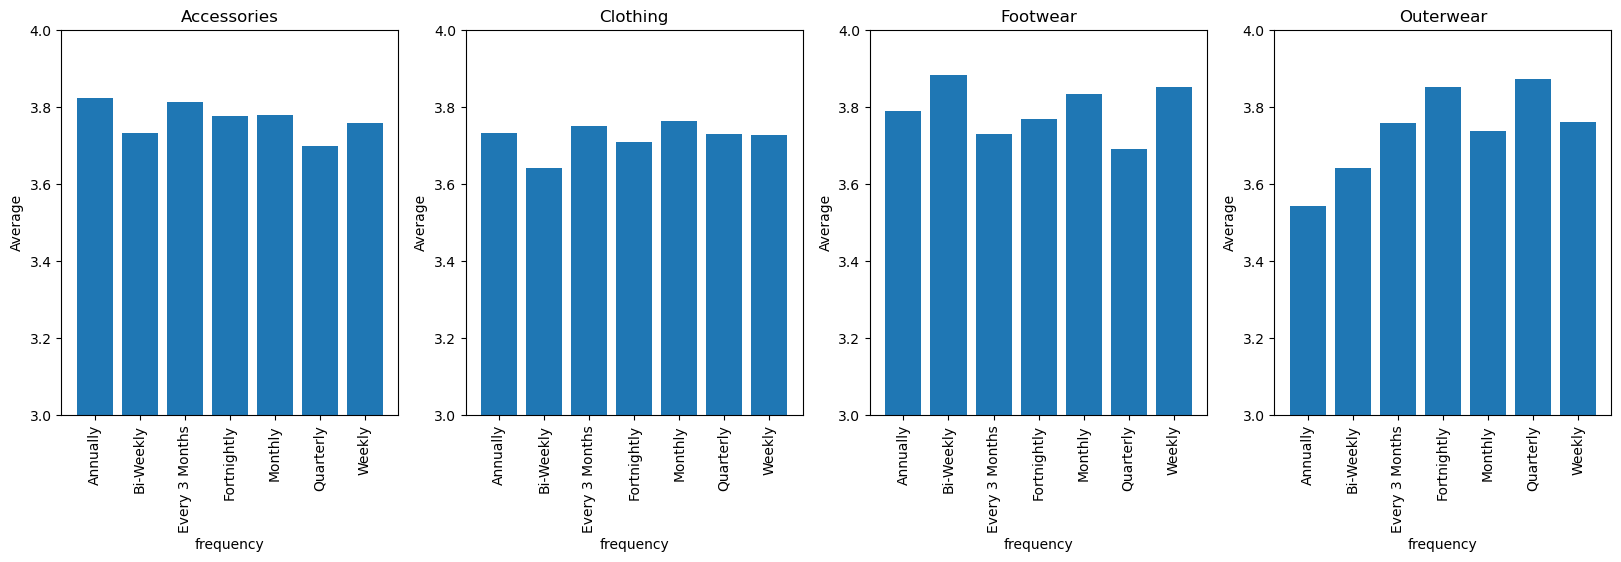

In [7]:
# 시각화 - 카테고리 별로 구매 빈번도에 따른 리뷰 평균
frequency = ['Annually', 'Bi-Weekly', 'Every 3 Months', 'Fortnightly', 'Monthly', 'Quarterly', 'Weekly']
categories = ['Accessories', 'Clothing', 'Footwear', 'Outerwear']

fig, axes = plt.subplots(1, 4, figsize = (20, 5))

axes[0].bar(frequency, df[4][:7])
axes[0].set_title('Accessories')
axes[0].set_xlabel('frequency')
axes[0].set_ylabel('Average')
axes[0].set_xticklabels(frequency, rotation = 90)
axes[0].set_ylim([3, 4])
axes[1].bar(frequency, df[4][7:14])
axes[1].set_title('Clothing')
axes[1].set_xlabel('frequency')
axes[1].set_ylabel('Average')
axes[1].set_xticklabels(frequency, rotation = 90)
axes[1].set_ylim([3, 4])
axes[2].bar(frequency, df[4][14:21])
axes[2].set_title('Footwear')
axes[2].set_xlabel('frequency')
axes[2].set_ylabel('Average')
axes[2].set_xticklabels(frequency, rotation = 90)
axes[2].set_ylim([3, 4])
axes[3].bar(frequency, df[4][21:28])
axes[3].set_title('Outerwear')
axes[3].set_xlabel('frequency')
axes[3].set_ylabel('Average')
axes[3].set_xticklabels(frequency, rotation = 90)
axes[3].set_ylim([3, 4])

plt.show()

C:\Users\Daylight\AppData\Local\Temp\ipykernel_30568\240225341.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(frequency, rotation = 90)
C:\Users\Daylight\AppData\Local\Temp\ipykernel_30568\240225341.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(frequency, rotation = 90)
C:\Users\Daylight\AppData\Local\Temp\ipykernel_30568\240225341.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(frequency, rotation = 90)
C:\Users\Daylight\AppData\Local\Temp\ipykernel_30568\240225341.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[3].set_xticklabels(frequency, rotation = 90)


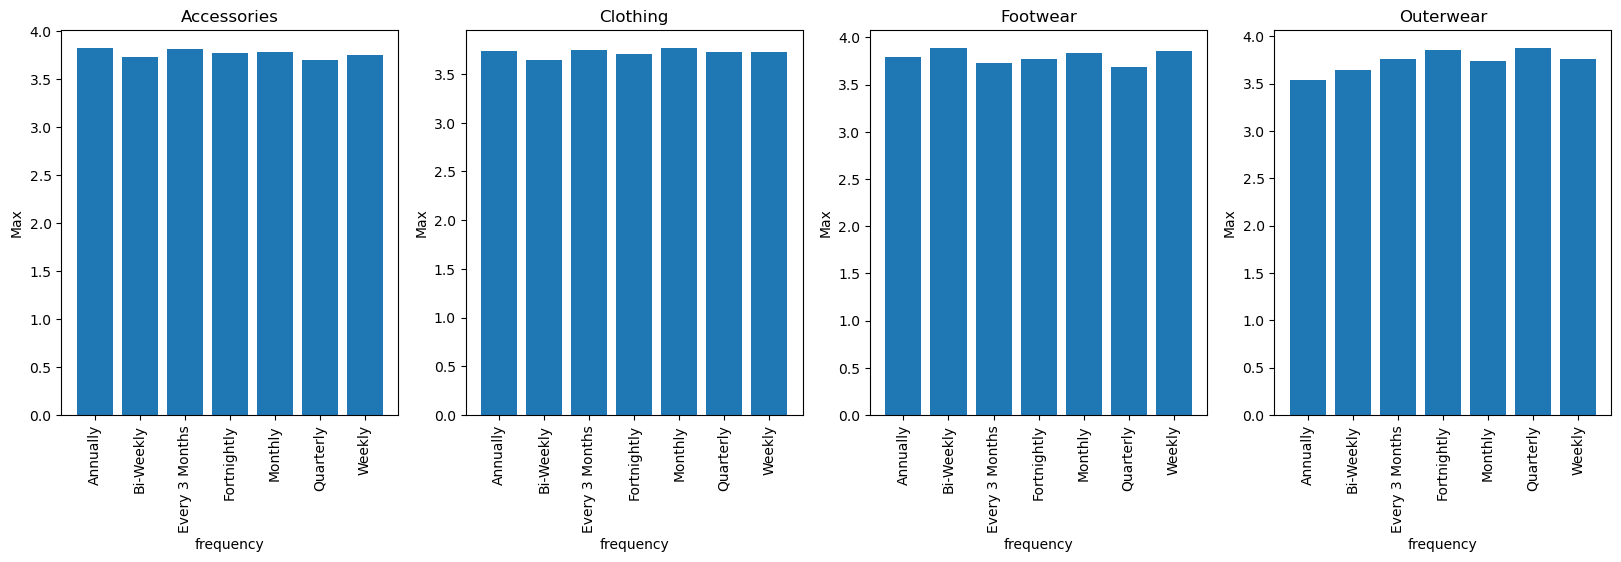

In [8]:
# 시각화 - 카테고리 별로 구매 빈번도에 따른 이전에 구매한 평균 횟수
frequency = ['Annually', 'Bi-Weekly', 'Every 3 Months', 'Fortnightly', 'Monthly', 'Quarterly', 'Weekly']
categories = ['Accessories', 'Clothing', 'Footwear', 'Outerwear']

fig, axes = plt.subplots(1, 4, figsize = (20, 5))

axes[0].bar(frequency, df[4][:7])
axes[0].set_title('Accessories')
axes[0].set_xlabel('frequency')
axes[0].set_ylabel('Max')
axes[0].set_xticklabels(frequency, rotation = 90)
axes[1].bar(frequency, df[4][7:14])
axes[1].set_title('Clothing')
axes[1].set_xlabel('frequency')
axes[1].set_ylabel('Max')
axes[1].set_xticklabels(frequency, rotation = 90)
axes[2].bar(frequency, df[4][14:21])
axes[2].set_title('Footwear')
axes[2].set_xlabel('frequency')
axes[2].set_ylabel('Max')
axes[2].set_xticklabels(frequency, rotation = 90)
axes[3].bar(frequency, df[4][21:28])
axes[3].set_title('Outerwear')
axes[3].set_xlabel('frequency')
axes[3].set_ylabel('Max')
axes[3].set_xticklabels(frequency, rotation = 90)

plt.show()

In [9]:
# 카테고리 별 구매 빈도
sql = '''
    select
        C,
        COUNT(C) as Category_count,
        AVG(PA) as Purchase_mean,
        max(S) as Season_max,
        COUNT(S) as Season_count,        
        AVG(RR) as Review_mean,
        AVG(PP) as Previous_mean,
        min(FP) as Frequency_min,
        count(FP) as Frequency_count
    from
        pri_table
    group by
        C, FP
    order by
        1
'''
cur.execute(pri_table + sql)

result = cur.fetchall()

df = pd.DataFrame(result)
df


,0,1,2,3,4,5,6,7,8
0,Accessories,184,61.0326,Winter,184,3.823370,25.3478,Annually,184
1,Accessories,180,60.7389,Winter,180,3.731667,24.4556,Bi-Weekly,180
2,Accessories,180,59.3333,Winter,180,3.812778,26.1889,Every 3 Months,180
3,Accessories,170,58.1000,Winter,170,3.777647,24.4294,Fortnightly,170
4,Accessories,171,58.0526,Winter,171,3.780117,25.4620,Monthly,171
5,Accessories,189,59.4180,Winter,189,3.699471,26.8413,Quarterly,189
6,Accessories,166,62.1867,Winter,166,3.757831,27.3494,Weekly,166
7,Clothing,258,60.6395,Winter,258,3.731783,24.5775,Annually,258
8,Clothing,247,59.8704,Winter,247,3.642105,25.5951,Bi-Weekly,247
9,Clothing,265,60.8226,Winter,265,3.750566,24.8415,Every 3 Months,265


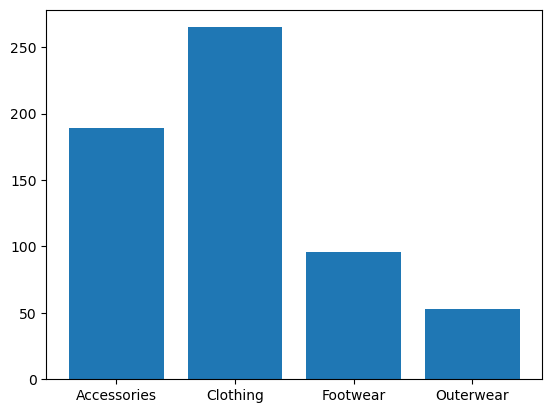

In [10]:
# 카테고리 별 구매 빈도

plt.bar(df[0], df[1])
plt.show()

In [11]:
# 카테고리 별 별점 리뷰 개수
sql = '''
    select
        C,
        RR
    from
        pri_table
    order by
        1
'''
cur.execute(pri_table + sql)

result = cur.fetchall()

df = pd.DataFrame(result)
df


,0,1
0,Accessories,4.9
1,Accessories,4.7
2,Accessories,4.7
3,Accessories,2.9
4,Accessories,2.9
...,...,...
3895,Outerwear,3.7
3896,Outerwear,3.7
3897,Outerwear,2.8
3898,Outerwear,4.3


C:\Users\Daylight\AppData\Local\Temp\ipykernel_30568\2993964953.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(rating, rotation = 90)
C:\Users\Daylight\AppData\Local\Temp\ipykernel_30568\2993964953.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(rating, rotation = 90)
C:\Users\Daylight\AppData\Local\Temp\ipykernel_30568\2993964953.py:54: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(rating, rotation = 90)
C:\Users\Daylight\AppData\Local\Temp\ipykernel_30568\2993964953.py:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[3].set_xticklabels(rating, rotation = 90)


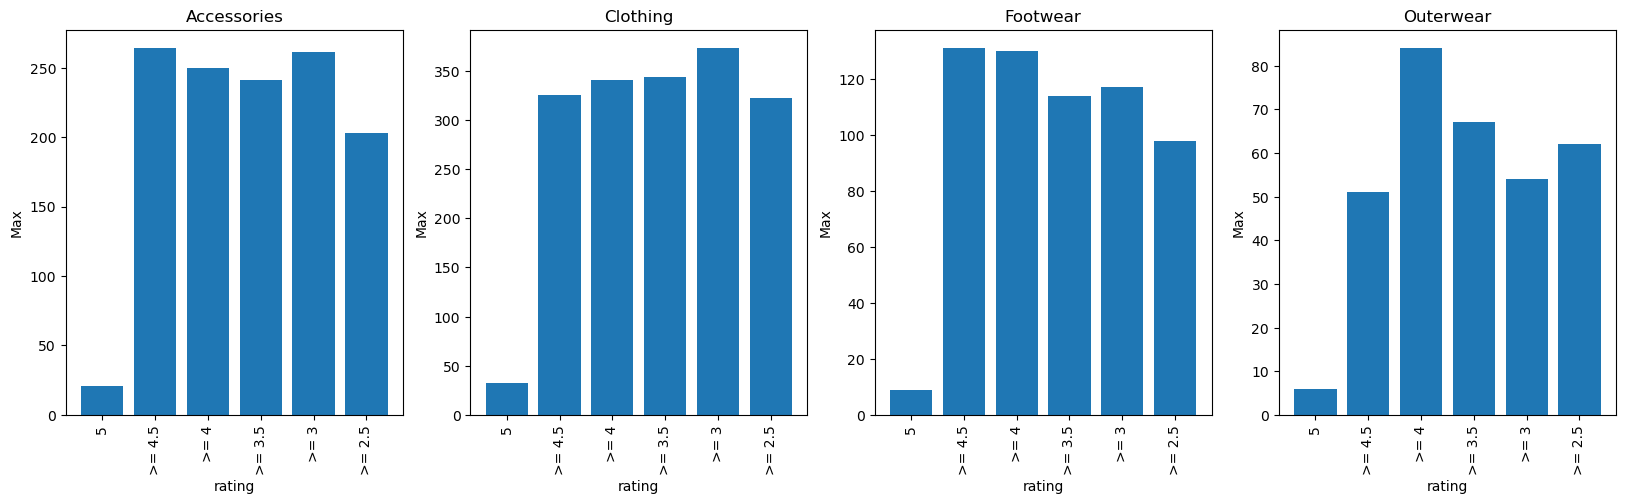

In [12]:
a1 = df[(df[0] == 'Accessories') & (df[1] == 5)]
a2 = df[(df[0] == 'Accessories') & ((df[1] >= 4.5)&(df[1] < 5))]
a3 = df[(df[0] == 'Accessories') & ((df[1] >= 4)&(df[1] < 4.5))]
a4 = df[(df[0] == 'Accessories') & ((df[1] >= 3.5)&(df[1] < 4))]
a5 = df[(df[0] == 'Accessories') & ((df[1] >= 3)&(df[1] < 3.5))]
a6 = df[(df[0] == 'Accessories') & ((df[1] >= 2.5)&(df[1] < 3))]

c1 = df[(df[0] == 'Clothing') & (df[1] == 5)]
c2 = df[(df[0] == 'Clothing') & ((df[1] >= 4.5)&(df[1] < 5))]
c3 = df[(df[0] == 'Clothing') & ((df[1] >= 4)&(df[1] < 4.5))]
c4 = df[(df[0] == 'Clothing') & ((df[1] >= 3.5)&(df[1] < 4))]
c5 = df[(df[0] == 'Clothing') & ((df[1] >= 3)&(df[1] < 3.5))]
c6 = df[(df[0] == 'Clothing') & ((df[1] >= 2.5)&(df[1] < 3))]

f1 = df[(df[0] == 'Footwear') & (df[1] == 5)]
f2 = df[(df[0] == 'Footwear') & ((df[1] >= 4.5)&(df[1] < 5))]
f3 = df[(df[0] == 'Footwear') & ((df[1] >= 4)&(df[1] < 4.5))]
f4 = df[(df[0] == 'Footwear') & ((df[1] >= 3.5)&(df[1] < 4))]
f5 = df[(df[0] == 'Footwear') & ((df[1] >= 3)&(df[1] < 3.5))]
f6 = df[(df[0] == 'Footwear') & ((df[1] >= 2.5)&(df[1] < 3))]

o1 = df[(df[0] == 'Outerwear') & (df[1] == 5)]
o2 = df[(df[0] == 'Outerwear') & ((df[1] >= 4.5)&(df[1] < 5))]
o3 = df[(df[0] == 'Outerwear') & ((df[1] >= 4)&(df[1] < 4.5))]
o4 = df[(df[0] == 'Outerwear') & ((df[1] >= 3.5)&(df[1] < 4))]
o5 = df[(df[0] == 'Outerwear') & ((df[1] >= 3)&(df[1] < 3.5))]
o6 = df[(df[0] == 'Outerwear') & ((df[1] >= 2.5)&(df[1] < 3))]

a_list = [len(a1), len(a2), len(a3), len(a4), len(a5), len(a6)]
c_list = [len(c1), len(c2), len(c3), len(c4), len(c5), len(c6)]
f_list = [len(f1), len(f2), len(f3), len(f4), len(f5), len(f6)]
o_list = [len(o1), len(o2), len(o3), len(o4), len(o5), len(o6)]

# 시각화 - 카테고리 별로 리뷰 구매 횟수
rating = ['5', '>= 4.5', '>= 4', '>= 3.5', '>= 3', '>= 2.5']
categories = ['Accessories', 'Clothing', 'Footwear', 'Outerwear']

fig, axes = plt.subplots(1, 4, figsize = (20, 5))

axes[0].bar(rating, a_list)
axes[0].set_title('Accessories')
axes[0].set_xlabel('rating')
axes[0].set_ylabel('Max')
axes[0].set_xticklabels(rating, rotation = 90)
axes[1].bar(rating, c_list)
axes[1].set_title('Clothing')
axes[1].set_xlabel('rating')
axes[1].set_ylabel('Max')
axes[1].set_xticklabels(rating, rotation = 90)
axes[2].bar(rating, f_list)
axes[2].set_title('Footwear')
axes[2].set_xlabel('rating')
axes[2].set_ylabel('Max')
axes[2].set_xticklabels(rating, rotation = 90)
axes[3].bar(rating, o_list)
axes[3].set_title('Outerwear')
axes[3].set_xlabel('rating')
axes[3].set_ylabel('Max')
axes[3].set_xticklabels(rating, rotation = 90)

plt.show()

# Clothing은 3 ~ 3.5가 가장 많았다. 그 외는 4 이상이 많음

In [13]:
clothing_table = '''
    with cloth_table as (
        select
            Item_Purchased as IP,
            Category as C,
            Purchase_Amount as PA,
            Season as S,
            Review_Rating as RR,
            Previous_Purchases as PP,
            Frequency_of_Purchases as FP
        from
            shopping_trends as shopping
        where
            Category = 'Clothing'
    )
'''


In [14]:
sql = '''
    select
        IP,
        count(IP) as count_IP,
        AVG(RR) as average_RR,
        AVG(PA) as average_PA,
        SUM(PA) as sum_PA,
        AVG(PP) as average_PP,
        SUM(PP) as sum_PP,
        count(FP) as count_FP
    from
        cloth_table
    group by
        IP
    order by
        3 desc
'''

cur.execute(clothing_table + sql)

result = cur.fetchall()

df = pd.DataFrame(result)
df

,0,1,2,3,4,5,6,7
0,T-shirt,147,3.782993,62.9116,9248,24.8163,3648,147
1,Skirt,158,3.782278,59.5063,9402,24.8418,3925,158
2,Sweater,164,3.767073,57.6951,9462,25.6037,4199,164
3,Dress,166,3.754819,62.1687,10320,26.5482,4407,166
4,Socks,159,3.750943,58.1887,9252,24.9371,3965,159
5,Hoodie,151,3.719205,58.0596,8767,24.3245,3673,151
6,Pants,171,3.718713,59.0058,10090,25.1579,4302,171
7,Shorts,157,3.711465,60.0828,9433,26.0382,4088,157
8,Blouse,171,3.683626,60.8772,10410,26.6842,4563,171
9,Jeans,124,3.648387,60.8710,7548,21.4758,2663,124


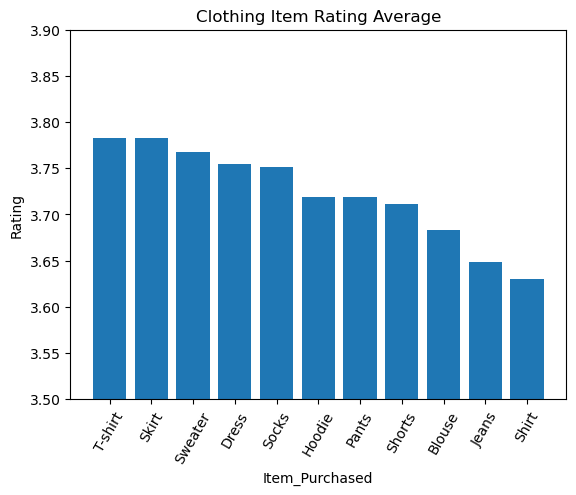

In [15]:
plt.bar(df[0], df[2])
plt.title('Clothing Item Rating Average')
plt.xlabel('Item_Purchased')
plt.ylabel('Rating')

plt.ylim([3.5, 3.9])
plt.xticks(df[0], rotation = 60)

plt.show()

In [21]:
# 카테고리 별 구매 빈도(Frequency of Purchases) 관계
sql = '''
    select
        C,
        FP,
        count(FP) as count_FP
    from
        pri_table
    group by
        C, FP
    order by
        1
'''
cur.execute(pri_table + sql)

result = cur.fetchall()

df = pd.DataFrame(result)
df


,0,1,2
0,Accessories,Annually,184
1,Accessories,Bi-Weekly,180
2,Accessories,Every 3 Months,180
3,Accessories,Fortnightly,170
4,Accessories,Monthly,171
5,Accessories,Quarterly,189
6,Accessories,Weekly,166
7,Clothing,Annually,258
8,Clothing,Bi-Weekly,247
9,Clothing,Every 3 Months,265


C:\Users\Daylight\AppData\Local\Temp\ipykernel_30568\4292347809.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(frequency, rotation = 90)
C:\Users\Daylight\AppData\Local\Temp\ipykernel_30568\4292347809.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(frequency, rotation = 90)
C:\Users\Daylight\AppData\Local\Temp\ipykernel_30568\4292347809.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(frequency, rotation = 90)
C:\Users\Daylight\AppData\Local\Temp\ipykernel_30568\4292347809.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[3].set_xticklabels(frequency, rotation = 90)


[Text(0, 0, 'Annually'),
 Text(1, 0, 'Bi-Weekly'),
 Text(2, 0, 'Every 3 Months'),
 Text(3, 0, 'Fortnightly'),
 Text(4, 0, 'Monthly'),
 Text(5, 0, 'Quarterly'),
 Text(6, 0, 'Weekly')]

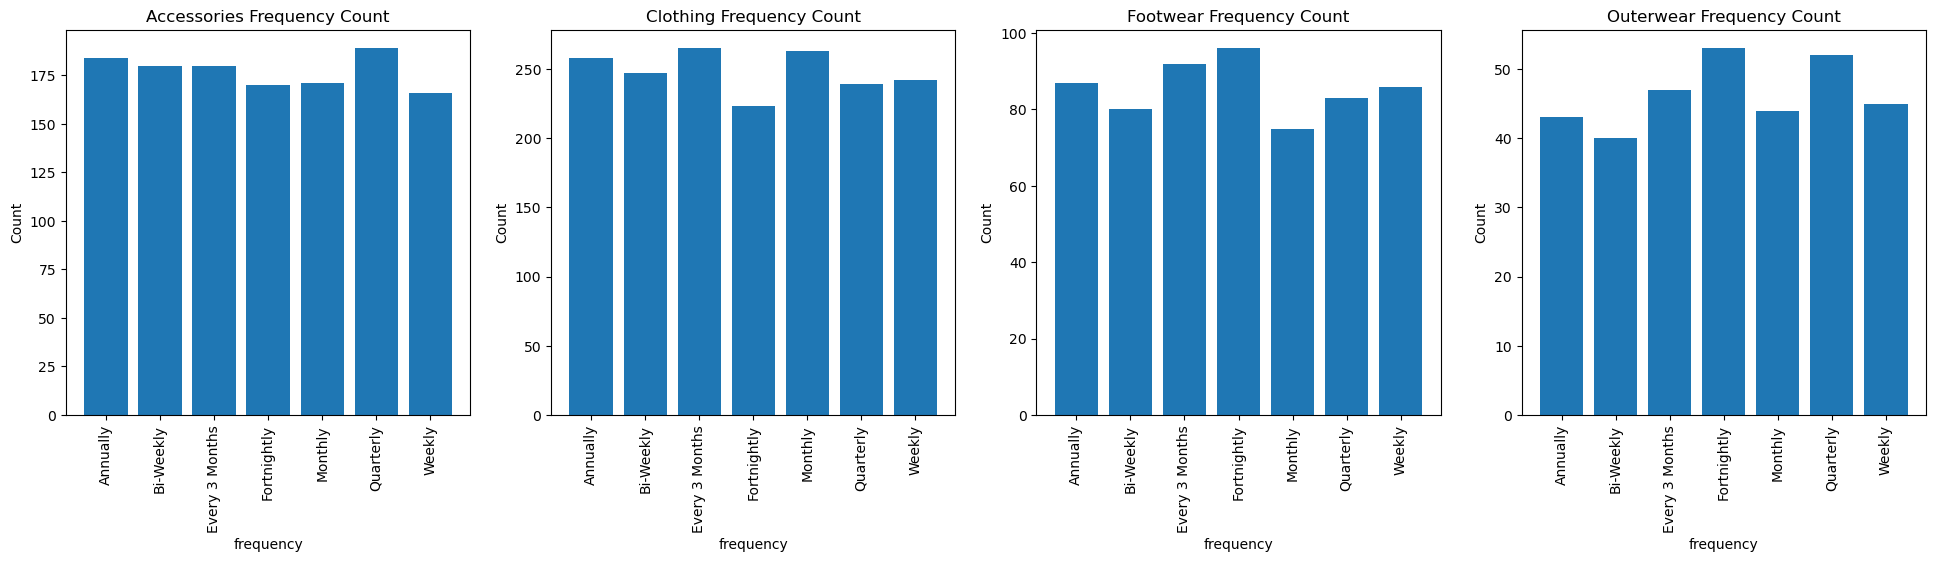

In [24]:
categories = ['Accessories', 'Clothing', 'Footwear', 'Outerwear']
frequency = ['Annually', 'Bi-Weekly', 'Every 3 Months', 'Fortnightly', 'Monthly', 'Quarterly', 'Weekly']

fig, axes = plt.subplots(1, 4, figsize = (24, 5))

axes[0].bar(frequency, df[2][:7])
axes[0].set_title('Accessories Frequency Count')
axes[0].set_xlabel('frequency')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(frequency, rotation = 90)

axes[1].bar(frequency, df[2][7:14])
axes[1].set_title('Clothing Frequency Count')
axes[1].set_xlabel('frequency')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(frequency, rotation = 90)

axes[2].bar(frequency, df[2][14:21])
axes[2].set_title('Footwear Frequency Count')
axes[2].set_xlabel('frequency')
axes[2].set_ylabel('Count')
axes[2].set_xticklabels(frequency, rotation = 90)

axes[3].bar(frequency, df[2][21:28])
axes[3].set_title('Outerwear Frequency Count')
axes[3].set_xlabel('frequency')
axes[3].set_ylabel('Count')
axes[3].set_xticklabels(frequency, rotation = 90)

In [ ]:
categories = ['Accessories', 'Clothing', 'Footwear', 'Outerwear']
frequency = ['SUM', 'AVERAGE', 'MAX', 'MIN']

fig, axes = plt.subplots(1, 2, figsize = (12, 5))

axes[0].bar(categories, df[1])
axes[0].set_title('Previous_Purchases_SUM')
axes[0].set_xlabel('category')
axes[0].set_ylabel('SUM')
axes[0].set_xticklabels(categories, rotation = 90)
axes[1].bar(categories, df[2])
axes[1].set_title('Previous_Purchases_AVERAGE')
axes[1].set_xlabel('category')
axes[1].set_ylabel('AVERAGE')
axes[1].set_xticklabels(categories, rotation = 90)
axes[1].set_ylim([20, 28])

Text(0, 0.5, 'Count')

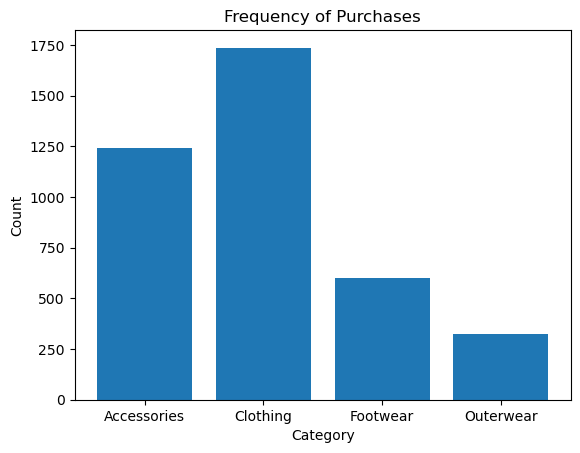

In [17]:
plt.bar(df[0], df[1])
plt.title('Frequency of Purchases')
plt.xlabel('Category')
plt.ylabel('Count')

In [18]:
# 카테고리 별 이전에 구매한 경험 관계
sql = '''
    select
        C,
        SUM(PP) as sum_PP,
        AVG(PP) as average_PP,
        MAX(PP) as max_PP,
        MIN(PP) as min_PP
    from
        pri_table
    group by
        C
    order by
        1
'''
cur.execute(pri_table + sql)

result = cur.fetchall()

df = pd.DataFrame(result)
df


,0,1,2,3,4
0,Accessories,31900,25.7258,50,1
1,Clothing,43771,25.1992,50,1
2,Footwear,15114,25.2321,50,1
3,Outerwear,8086,24.9568,50,1


C:\Users\Daylight\AppData\Local\Temp\ipykernel_30568\1325267606.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(categories, rotation = 90)
C:\Users\Daylight\AppData\Local\Temp\ipykernel_30568\1325267606.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(categories, rotation = 90)


(20.0, 28.0)

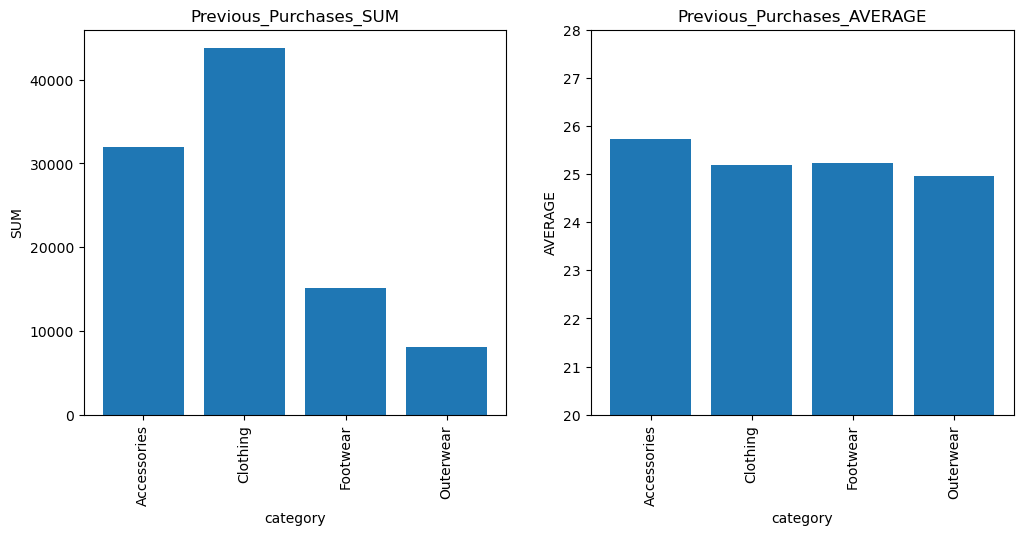

In [19]:
categories = ['Accessories', 'Clothing', 'Footwear', 'Outerwear']
method = ['SUM', 'AVERAGE', 'MAX', 'MIN']

fig, axes = plt.subplots(1, 2, figsize = (12, 5))

axes[0].bar(categories, df[1])
axes[0].set_title('Previous_Purchases_SUM')
axes[0].set_xlabel('category')
axes[0].set_ylabel('SUM')
axes[0].set_xticklabels(categories, rotation = 90)
axes[1].bar(categories, df[2])
axes[1].set_title('Previous_Purchases_AVERAGE')
axes[1].set_xlabel('category')
axes[1].set_ylabel('AVERAGE')
axes[1].set_xticklabels(categories, rotation = 90)
axes[1].set_ylim([20, 28])